# Real Estate - advanced estimator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## (1) Data Exploration

We load the dataset **flats.csv** below

In [2]:
flats = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/flats.csv')
flats.head(10)

,price,bedrooms,surface,floors
0,274.0,3,1830,2.0
1,500.0,4,2120,1.0
2,320.0,3,1260,1.0
3,445.5,3,1880,1.0
4,637.5,3,1680,1.0
5,460.0,2,2730,1.0
6,259.0,3,1270,1.5
7,950.0,3,2780,1.0
8,550.0,3,1930,2.0
9,265.5,3,1860,1.0


👀 Use `scatterplots` to  figure out visually <u><i>which feature gives the most information about prices:</i></u>

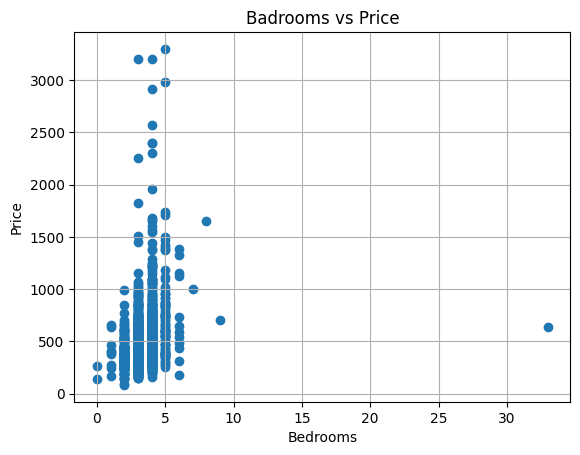

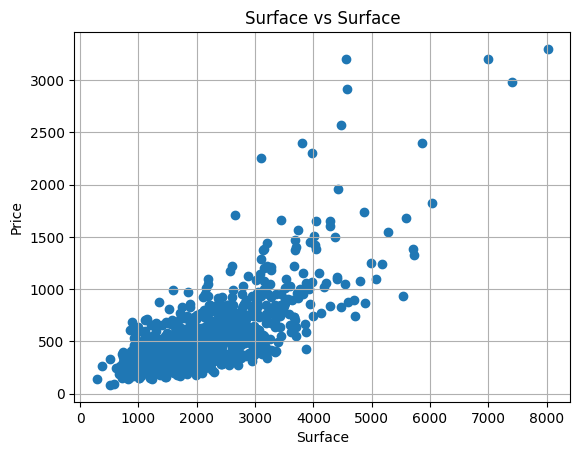

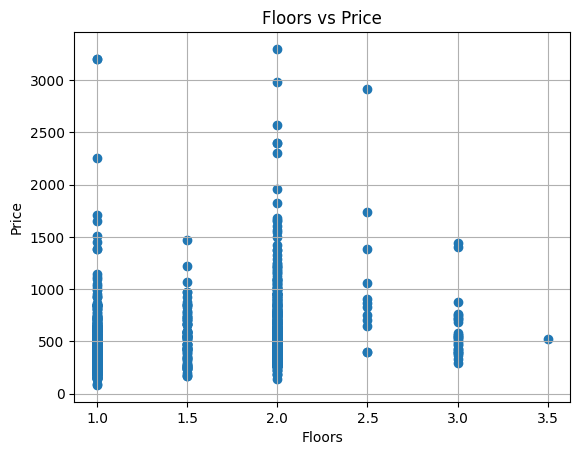

In [3]:
df = pd.DataFrame(flats)
plt.scatter(df["bedrooms"], df["price"])
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Badrooms vs Price")
plt.grid(True)
plt.show()

plt.scatter(df["surface"], df["price"])
plt.xlabel("Surface")
plt.ylabel("Price")
plt.title("Surface vs Surface")
plt.grid(True)
plt.show()

plt.scatter(df["floors"], df["price"])
plt.xlabel("Floors")
plt.ylabel("Price")
plt.title("Floors vs Price")
plt.grid(True)
plt.show()


In [4]:
df_core = df.corr()
df_core

,price,bedrooms,surface,floors
price,1.000000,0.239623,0.732790,0.258263
bedrooms,0.239623,1.000000,0.417170,0.131993
surface,0.732790,0.417170,1.000000,0.357512
floors,0.258263,0.131993,0.357512,1.000000


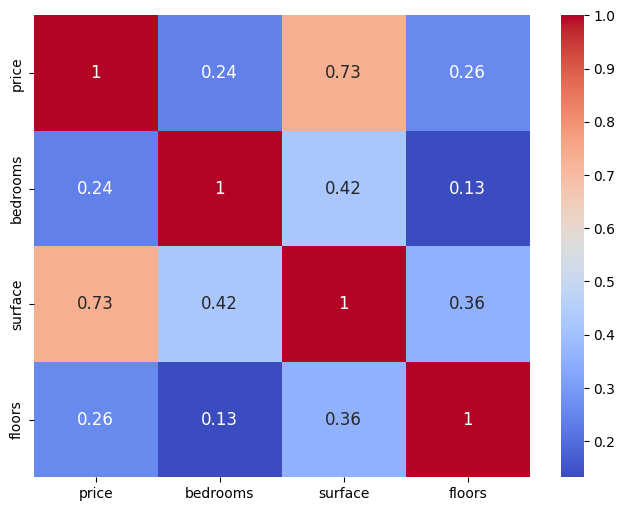

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_core, annot=True, cmap="coolwarm", annot_kws={"fontsize": 12});

## (2) Estimator with 1 feature

### (2.1) Visual approach

In [6]:
def plot_line(slope, intercept):
    x = flats['surface']
    y_pred = slope * x + intercept
    sns.scatterplot(x="surface", y="price", data=flats)
    sns.lineplot(x=x, y=y_pred, color='red')
    plt.grid(True)
    plt.show();

Test your function by running the cell below, then change the values to see if you can approximate a good line of best fit!


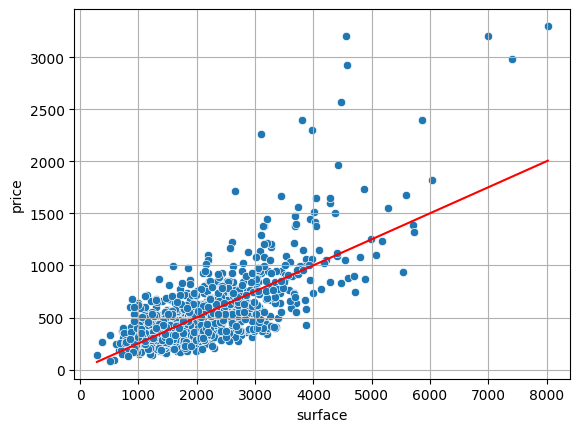

In [7]:
plot_line(0.25, 1)

### (2.2) Computational approach

#### (2.2.1) Squared Errors

<u><b>Step 1</b></u>

❓For each row (_i.e. flat_), we should evaluate the `squared_error = (price - predicted_price)**2` ❓

In [8]:
def squared_errors(slope, intercept, surfaces, prices):
    """TO DO: return an array containing the squared errors between 
    all real prices from the dataset and the predicted prices
    """
    y_pred = slope * surfaces + intercept
    return (prices - y_pred) ** 2

#### (2.2.2) Mean Squared Errors (MSE)

<u><b>Step 2</b></u>

❓ Create the `mse` function which should return the mean of the array returned by the `squared_errors` function. ❓

In [9]:
def mse(slope, intercept, surfaces, prices):
    '''TO DO: Return the mean of the array contained in squared_errors as a float.'''
    return np.mean(squared_errors(slope, intercept, surfaces, prices))

👉 In section _(2.1) Visual approach_, you visually tried to estimate the "best line", which consists in finding the best pair `(slope, intercept)`. 

❓Using this "best pair", compute the MSE of your estimator. ❓

In [10]:
mse(0.25, 1, df["surface"], df["price"] )

59277.509597407

### (2.3) Finding the best parameters

#### (2.3.1) Finding the `best slope`

<b><i><u> Step 1 :</u></i></b>

Start by fixing an  `initial_intercept` with your best estimate, then find a slope which approximately minimizes the function  `mse=f(slope)`

In [11]:
# Define an initial_intercept, for instance, we may suppose there is always a small transaction fee even for very small flats?
initial_intercept = 1

In [12]:
# Create a range of 100 slopes which contains what you believe is the optimal slope (hint: np.linspace())
slopes = np.linspace(start=0.25, stop=0.30, num=100)
slopes

array([0.25      , 0.25050505, 0.2510101 , 0.25151515, 0.2520202 ,
       0.25252525, 0.2530303 , 0.25353535, 0.2540404 , 0.25454545,
       0.25505051, 0.25555556, 0.25606061, 0.25656566, 0.25707071,
       0.25757576, 0.25808081, 0.25858586, 0.25909091, 0.25959596,
       0.26010101, 0.26060606, 0.26111111, 0.26161616, 0.26212121,
       0.26262626, 0.26313131, 0.26363636, 0.26414141, 0.26464646,
       0.26515152, 0.26565657, 0.26616162, 0.26666667, 0.26717172,
       0.26767677, 0.26818182, 0.26868687, 0.26919192, 0.26969697,
       0.27020202, 0.27070707, 0.27121212, 0.27171717, 0.27222222,
       0.27272727, 0.27323232, 0.27373737, 0.27424242, 0.27474747,
       0.27525253, 0.27575758, 0.27626263, 0.27676768, 0.27727273,
       0.27777778, 0.27828283, 0.27878788, 0.27929293, 0.27979798,
       0.28030303, 0.28080808, 0.28131313, 0.28181818, 0.28232323,
       0.28282828, 0.28333333, 0.28383838, 0.28434343, 0.28484848,
       0.28535354, 0.28585859, 0.28636364, 0.28686869, 0.28737

In [13]:
# Create the list of MSEs for each slope value
mse_values = [mse(slop, initial_intercept, df["surface"], df["price"]) for slop in slopes]
mse_values

[59277.509597407,
 59223.071606620906,
 59171.39041957576,
 59122.46603627156,
 59076.2984567083,
 59032.88768088598,
 58992.233708804604,
 58954.33654046419,
 58919.19617586471,
 58886.81261500618,
 58857.18585788859,
 58830.31590451195,
 58806.20275487624,
 58784.84640898149,
 58766.24686682766,
 58750.40412841481,
 58737.31819374289,
 58726.9890628119,
 58719.41673562188,
 58714.60121217279,
 58712.54249246464,
 58713.240576497454,
 58716.6954642712,
 58722.90715578589,
 58731.875651041526,
 58743.600950038104,
 58758.08305277563,
 58775.321959254106,
 58795.31766947352,
 58818.07018343388,
 58843.579501135195,
 58871.84562257744,
 58902.868547760634,
 58936.64827668478,
 58973.18480934986,
 59012.4781457559,
 59054.52828590287,
 59099.33522979079,
 59146.898977419645,
 59197.21952878946,
 59250.29688390022,
 59306.13104275191,
 59364.722005344556,
 59426.069771678136,
 59490.17434175268,
 59557.035715568156,
 59626.653893124574,
 59699.02887442195,
 59774.160659460256,
 59852.04924

❓ Plot MSEs vs. slopes. Do you see a minimum ❓

🙃 If not, try another range of slopes!

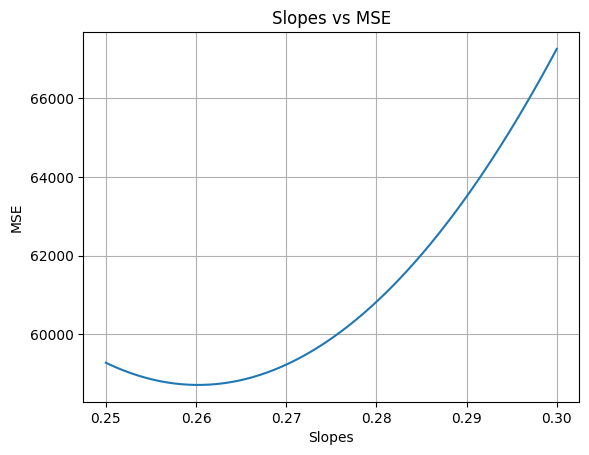

In [14]:
plt.plot(slopes, mse_values)
plt.xlabel("Slopes")
plt.ylabel("MSE")
plt.title("Slopes vs MSE")
plt.grid(True)
plt.show();

In [15]:
min_mse = min(mse_values)
print(f"Min MSE: {min_mse}")
slope_best =slopes[mse_values.index(min_mse)]
print(f"Best slope: {slope_best}")

Min MSE: 58712.54249246464
Best slope: 0.2601010101010101


#### (2.3.2) Finding the `best intercept`

<b><i><u> Step 2 :</u></i></b>

🔨 Let's now fix the slope to that `slope_best` value, then re-use the previous approach to find "the" `intercept_best`.

In [16]:
# Create a range of 100 intercepts which contains what you believe is the optimal intercept
intercepts = np.linspace(start=-50, stop=50, num=100)
intercepts

array([-50.        , -48.98989899, -47.97979798, -46.96969697,
       -45.95959596, -44.94949495, -43.93939394, -42.92929293,
       -41.91919192, -40.90909091, -39.8989899 , -38.88888889,
       -37.87878788, -36.86868687, -35.85858586, -34.84848485,
       -33.83838384, -32.82828283, -31.81818182, -30.80808081,
       -29.7979798 , -28.78787879, -27.77777778, -26.76767677,
       -25.75757576, -24.74747475, -23.73737374, -22.72727273,
       -21.71717172, -20.70707071, -19.6969697 , -18.68686869,
       -17.67676768, -16.66666667, -15.65656566, -14.64646465,
       -13.63636364, -12.62626263, -11.61616162, -10.60606061,
        -9.5959596 ,  -8.58585859,  -7.57575758,  -6.56565657,
        -5.55555556,  -4.54545455,  -3.53535354,  -2.52525253,
        -1.51515152,  -0.50505051,   0.50505051,   1.51515152,
         2.52525253,   3.53535354,   4.54545455,   5.55555556,
         6.56565657,   7.57575758,   8.58585859,   9.5959596 ,
        10.60606061,  11.61616162,  12.62626263,  13.63

In [17]:
# Create the list of MSEs for each intercept value
mse_values = [mse(slope_best, intercept, df["surface"],df["price"])for intercept in intercepts]
mse_values

[60753.82072040404,
 60662.896516077955,
 60574.01291985307,
 60487.16993172941,
 60402.367551706964,
 60319.60577978573,
 60238.884615965726,
 60160.20406024691,
 60083.56411262933,
 60008.96477311295,
 59936.40604169779,
 59865.887918383836,
 59797.4104031711,
 59730.97349605958,
 59666.57719704927,
 59604.22150614019,
 59543.906423332315,
 59485.63194862565,
 59429.39808202019,
 59375.20482351597,
 59323.05217311294,
 59272.94013081114,
 59224.86869661055,
 59178.837870511175,
 59134.84765251301,
 59092.89804261606,
 59052.98904082032,
 59015.120647125805,
 58979.29286153249,
 58945.505684040414,
 58913.75911464952,
 58884.05315335986,
 58856.38780017142,
 58830.76305508418,
 58807.17891809815,
 58785.635389213356,
 58766.13246842976,
 58748.67015574738,
 58733.24845116621,
 58719.867354686256,
 58708.526866307526,
 58699.22698603,
 58691.967713853686,
 58686.74904977859,
 58683.57099380472,
 58682.43354593206,
 58683.33670616059,
 58686.280474490355,
 58691.26485092133,
 58698.2898

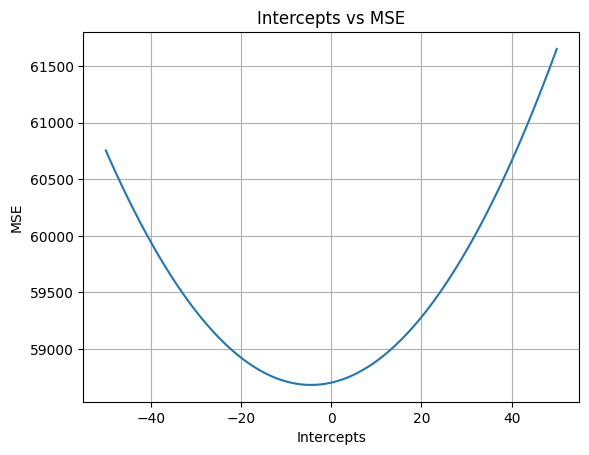

In [18]:
# Plot MSEs against slopes. Do you see a minimum? If not, try another range of slopes!
plt.plot(intercepts, mse_values)
plt.xlabel("Intercepts")
plt.ylabel("MSE")
plt.title("Intercepts vs MSE")
plt.grid(True)
plt.show();

❓ Compute `mse_min`, the minimum value of MSEs when slope is equal to `slope_best` best, and store the corresponding best intercept as `intercept_best` ❓


In [19]:
mse_min = min(mse_values)
print(f"Min MSE: {mse_min}")

Min MSE: 58682.43354593206


In [20]:
intercept_best = intercepts[mse_values.index(mse_min)]
print(f"Best Intercepts: {intercept_best}")

Best Intercepts: -4.54545454545454


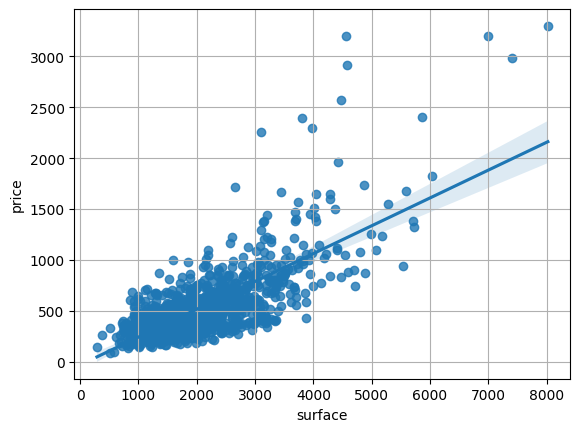

In [21]:
sns.regplot(data=flats, x='surface', y='price')
plt.grid(True)
plt.show();

In [22]:
import statsmodels.formula.api as smf

regression = smf.ols(formula= 'price ~ surface', data=flats).fit()

print("intercept_best", regression.params['Intercept'])
print("slope_best", regression.params['surface'])
print('mse_best: ', np.mean(regression.resid**2))

intercept_best -33.30833598535614
slope_best 0.27369043218689093
mse_best:  58515.1239094964


❓ Let's go back to our initial question: What is your new prediction for the 5th flat below? How does it compare with your initial prediction based only on 4 flats? 

- `surface`: 3000 $ft^2$
- `bedrooms`: 5 
- `floors`: 1

In [23]:
# compute predicted price (Remember that the real price is 750,000$)
surface_5_flat = 3000
bedrooms_5_flat = 5
floors_5_flat = 1
predicted_5_flat = int(intercept_best + slope_best * surface_5_flat) * 1000
predicted_5_flat

775000

## (3) Estimator with _all features_ (surface, bedrooms, floors)?

In [24]:
# Find the four regression coefficients by running this cell
import statsmodels.formula.api as smf
regression = smf.ols(formula= 'price ~ surface + bedrooms + floors', data=flats).fit()
regression.params

Intercept    18.154854
surface       0.286953
bedrooms    -21.623564
floors       -3.811868
dtype: float64

In [25]:
# Compute the newly predicted price for the 5th flat? Is this prediction better?
intercept = 18.154854
slope_surface = 0.286953
slope_bedrooms = -21.623564
slope_floors = -3.811868
new_predicted_price_5_flat = intercept + slope_surface * surface_5_flat + slope_bedrooms * bedrooms_5_flat + slope_floors * floors_5_flat
new_predicted_price_5_flat = (int(new_predicted_price_5_flat)) * 1000
new_predicted_price_5_flat

767000